In [1]:
datapath = "../data"

# Load the CRISPR data file
The CRISPR file is version 23Q4 from [DepMap Public repository](http://https://depmap.org/).
Post-Chronos Gene effect estimates for all models, integrated using Chronos.
Preprocessing include:
1. copy number corrected, 
2. scaled, and 
3. screen quality corrected.

Columns: Gene - Rows: ModelID

In [2]:
import pandas as pd
df = pd.read_csv(f'{datapath}/CRISPRGeneEffect.csv').rename(columns={'Unnamed: 0': 'gene'}).rename(columns=lambda x: x.split(' ')[0]).set_index('gene').T
print(f'{df.isna().sum().sum()} NaN over {len(df)*len(df.columns)} values')
df

739493 NaN over 20287300 values


gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,ACH-000017,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,0.022670,-0.096631,0.049811,-0.099040,-0.044896,...,-0.072582,-0.033722,-0.053881,-0.060617,0.025795,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,-0.057743,-0.024440,-0.158811,-0.070409,-0.115830,...,-0.237311,-0.108704,-0.114864,-0.042591,-0.132627,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,0.079679,0.041922,-0.003968,-0.029389,0.024537,...,-0.065940,0.079277,0.069333,0.030989,0.249826,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,0.227512,0.039121,0.034778,0.084594,-0.003710,...,0.101541,0.038977,0.066599,0.043809,0.064657,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,-0.130448,0.028947,-0.120875,-0.052288,-0.336776,...,0.005374,-0.144070,-0.256227,-0.116473,-0.294305,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,0.013401,0.005124,-0.089180,-0.005409,-0.070396,...,-0.296880,-0.084936,-0.128569,-0.110504,-0.087171,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,-0.296421,-0.131949,-0.145737,-0.216393,-0.257916,...,-0.332415,-0.193408,-0.327408,-0.257879,-0.349111,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,0.067705,-0.109147,-0.034886,-0.137350,0.029457,...,-0.005090,-0.218960,-0.053033,-0.041612,-0.057478,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,-0.232453,-0.164482,-0.175850,-0.168087,-0.284838,...,-0.188751,-0.120449,-0.267081,0.006148,-0.189602,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


# Load the map between cell lines and tissues
This data file maps cell lines identifires (`ModelID`), to the  tissue (`OncotreeLineage`), disease (`OncotreePrimaryDisease`), tumor type (`OncotreeSubtype`), etc. Yuo can use the following code  to select the corresponding cell lines in the CRISPR data file by choosing tissue/disease/tumor column.

In [3]:
import numpy as np
df_map = pd.read_csv(f'{datapath}/Model.csv')
print(df_map[['OncotreeLineage']].value_counts())
df_map

OncotreeLineage          
Lung                         249
Lymphoid                     211
CNS/Brain                    122
Skin                         120
Esophagus/Stomach             95
Breast                        94
Bowel                         89
Head and Neck                 84
Bone                          77
Myeloid                       77
Ovary/Fallopian Tube          75
Kidney                        73
Pancreas                      66
Peripheral Nervous System     56
Soft Tissue                   55
Biliary Tract                 44
Uterus                        41
Fibroblast                    41
Bladder/Urinary Tract         39
Normal                        39
Pleura                        35
Liver                         29
Cervix                        25
Eye                           21
Thyroid                       18
Prostate                      15
Testis                         7
Vulva/Vagina                   5
Muscle                         5
Ampulla of Vater 

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,...,TissueOrigin,CCLEName,CatalogNumber,PlateCoating,ModelDerivationMaterial,PublicComments,WTSIMasterCellID,SangerModelID,COSMICID,LegacySubSubtype
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NIHOVCAR3_OVARY,HTB-71,NaN,NaN,NaN,2201.0,SIDM00105,905933.0,high_grade_serous
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CCL-240,NaN,NaN,NaN,55.0,SIDM00829,905938.0,M3
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,CACO2_LARGE_INTESTINE,HTB-37,NaN,NaN,NaN,NaN,SIDM00891,NaN,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACC 11,NaN,NaN,NaN,783.0,SIDM00594,907053.0,M6
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL9217,NaN,NaN,NaN,NaN,SIDM00593,NaN,M6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,ACH-003157,PT-QDEP9D,ABM-T0822,ABMT0822,ZIMMMPLC,Lung,Non-Cancerous,Immortalized MPLC Cells,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1917,ACH-003158,PT-nszsxG,ABM-T9220,ABMT9220,ZIMMSMCI,Muscle,Non-Cancerous,"Immortalized Smooth Muscle Cells, Intestinal",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,ACH-003159,PT-AUxVvV,ABM-T9233,ABMT9233,ZIMMRSCH,Hair,Non-Cancerous,Immortalized Hair Follicle Inner Root Sheath C...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,ACH-003160,PT-AUxVvV,ABM-T9249,ABMT9249,ZIMMGMCH,Hair,Non-Cancerous,Immortalized Hair Germinal Matrix Cells,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Imputation of data (optional)
In this cell we apply KNN imputation to data cell lines, that may contain missing values (NaN).
We can apply imputation intwo modalities:
1. based on all cell lines, 
1. or grouping cell lines by belonging tissue.

It takes almost 5 minutes... time for coffe?

In [ ]:
from help.preprocess.imputer import imputer_knn, imputer_knn_group
if False:
    df = imputer_knn_group(df, df_map, verbose=True)

# Select all tissues (pan-tissue)
We can apply the labelling algorithm to all cell lines present in the CRISPR data file to compute the common essential genes, i.e. the *pan-tissue* (or pan-cancer, pan-disease, etc). This set of labels will be used in the following to get the context-specific essential genes for single tissue.

### Ignoring in Model tissue with few cell-lines
in this code we select in the CRISPR data file only cell lines belonging to tissue reported in the Model such that the number of lines is greater (or equal) to a specific amount.

In [4]:
from help.utility.selection import filter_crispr_by_model
df = filter_crispr_by_model(df, df_map, minlines=10, line_group='OncotreeLineage')
df

gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,ACH-000017,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,0.022670,-0.096631,0.049811,-0.099040,-0.044896,...,-0.072582,-0.033722,-0.053881,-0.060617,0.025795,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,-0.057743,-0.024440,-0.158811,-0.070409,-0.115830,...,-0.237311,-0.108704,-0.114864,-0.042591,-0.132627,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,0.079679,0.041922,-0.003968,-0.029389,0.024537,...,-0.065940,0.079277,0.069333,0.030989,0.249826,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,0.227512,0.039121,0.034778,0.084594,-0.003710,...,0.101541,0.038977,0.066599,0.043809,0.064657,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,-0.130448,0.028947,-0.120875,-0.052288,-0.336776,...,0.005374,-0.144070,-0.256227,-0.116473,-0.294305,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,0.013401,0.005124,-0.089180,-0.005409,-0.070396,...,-0.296880,-0.084936,-0.128569,-0.110504,-0.087171,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,-0.296421,-0.131949,-0.145737,-0.216393,-0.257916,...,-0.332415,-0.193408,-0.327408,-0.257879,-0.349111,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,0.067705,-0.109147,-0.034886,-0.137350,0.029457,...,-0.005090,-0.218960,-0.053033,-0.041612,-0.057478,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,-0.232453,-0.164482,-0.175850,-0.168087,-0.284838,...,-0.188751,-0.120449,-0.267081,0.006148,-0.189602,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


### Labelling across all tissues (pan-tissue) with mode of mode

In [5]:
import warnings
warnings.filterwarnings("ignore")
from help.utility.selection import select_cell_lines, delrows_with_nan_percentage
from help.models.labelling import labelling
cell_lines = select_cell_lines(df, df_map, tissue_list='all', nested=True)
print(f"Selecting {len(cell_lines)} tissue for a total of {sum([len(x) for x in cell_lines])} cell-lines")
# remove rows with all nans
df_nonan = delrows_with_nan_percentage(df, perc=80)
df_label = labelling(df_nonan, columns=cell_lines, n_classes=2, labelnames={1: 'NE', 0: 'E'}, 
                     mode='flat-multi', algorithm='otsu')
df_label.to_csv("label_PanTissue_group.csv")
df_label.value_counts(), f"Nan: {df_label['label'].isna().sum()}"

Selecting 24 tissue for a total of 1091 cell-lines
Removed 512 rows from 18443 with at least 80% NaN


100%|██████████| 33/33 [00:00<00:00, 710.12it/s]


(label
 NE       16681
 E         1250
 Name: count, dtype: int64,
 'Nan: 0')

### Labelling across all tissues (pan-tissue) with flat mode across all lines

In [6]:
from help.utility.selection import delrows_with_nan_percentage
from help.models.labelling import labelling
# remove rows with all nans
cell_lines = select_cell_lines(df, df_map, tissue_list='all', nested=False)
df_nonan = delrows_with_nan_percentage(df, perc=80)
df_label = labelling(df_nonan, columns=cell_lines, n_classes=2, labelnames={1: 'NE', 0: 'E'}, 
                     mode='flat-multi', algorithm='otsu')
df_label.to_csv("label_PanTissue.csv")
df_label.value_counts(), f"Nan: {df_label['label'].isna().sum()}"

Removed 512 rows from 18443 with at least 80% NaN


100%|██████████| 1091/1091 [00:01<00:00, 690.87it/s]


(label
 NE       16668
 E         1263
 Name: count, dtype: int64,
 'Nan: 0')

# Select some tissues
or we can apply labelling algorithm to a set of tissues.

In [7]:
tissue = 'Kidney'
from help.utility.selection import select_cell_lines, delrows_with_nan_percentage
from help.models.labelling import labelling
cell_lines = select_cell_lines(df, df_map, [tissue])
print(f"Selecting {len(cell_lines)} cell-lines")
# remove rows with all nans
df_nonan = delrows_with_nan_percentage(df[cell_lines], perc=100)
df_label = labelling(df_nonan, columns = cell_lines, n_classes=2, mode='flat-multi', algorithm='otsu')
df_label.to_csv(f"label_{tissue}.csv")
df_label.value_counts(), f"Nan: {df_label['label'].isna().sum()}"

Selecting 37 cell-lines
Removed 512 rows from 18443 with at least 100% NaN


  0%|          | 0/37 [00:00<?, ?it/s]

100%|██████████| 37/37 [00:00<00:00, 615.37it/s]


(label
 NE       16678
 E         1253
 Name: count, dtype: int64,
 'Nan: 0')

In this example you use a UI for selecting tissues to focus on. A slider allows you to set the minimum number of lines the tissue must have (default is 1).

In [8]:
tissue = 'Lung'
from help.utility.selection import select_cell_lines, delrows_with_nan_percentage
from help.models.labelling import labelling
cell_lines = select_cell_lines(df, df_map, [tissue])
print(f"Selecting {len(cell_lines)} cell-lines")
# remove rows with all nans
df_nonan = delrows_with_nan_percentage(df[cell_lines], perc=100)
df_label = labelling(df_nonan, columns = cell_lines, n_classes=2, mode='flat-multi', algorithm='otsu')
#df_label = labelling(df_nonan, columns = [cell_lines], n_classes=3, labelnames={2: 'NE', 1: 'aE', 0:'E'}, mode='two-by-two', algorithm='otsu')
df_label.to_csv(f"label_{tissue}.csv")
df_label.value_counts(), f"Nan: {df_label['label'].isna().sum()}"

Selecting 119 cell-lines
Removed 0 rows from 18443 with at least 100% NaN


100%|██████████| 119/119 [00:00<00:00, 737.14it/s]


(label
 NE       17167
 E         1276
 Name: count, dtype: int64,
 'Nan: 0')

# Context specific EGs
In this section we make the difference between pan-tissue EGs (common EGs) and tissue EGs to get the context-specific EGs for the tissue (csEGs).
In this forst code/plot we show the csEGs of Lung and Kidney by subtracting the common EGs computed by grouping tissue cell-lines (`label_PanTissue_group.csv`). In the second code/plot we show the csEGs of the two tissues by subtracting the common EGs computed on all cell-lines in flat mode (`label_PanTissue.csv`)

Subtracting 1250 common EGs...
Overlapping of 5 genes between ['Kidney', 'Lung']
55 genes only in Kidney
63 genes only in Lung


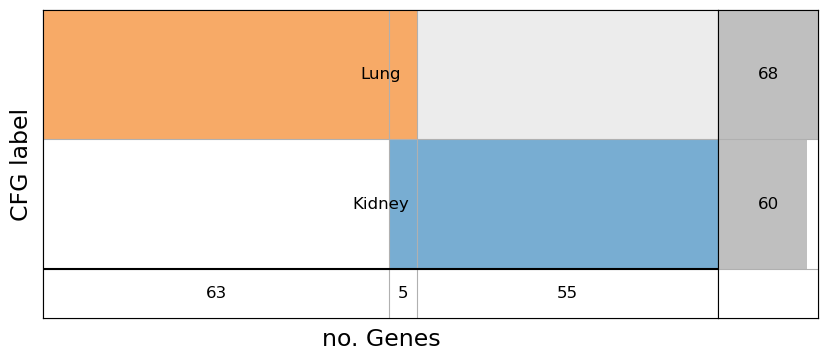

In [10]:
from help.utility.selection import EG_tissues_intersect
csEGs, overlap, diffs = EG_tissues_intersect(tissues = {'Kidney': pd.read_csv(f'{datapath}/label_Kidney.csv', index_col=0),
                                                        'Lung': pd.read_csv(f'{datapath}/label_Lung.csv', index_col=0)
                                                       }, 
                        common_df = pd.read_csv(f'{datapath}/label_PanTissue_group.csv', index_col=0),
                        display=True, verbose=True)

Subtracting 1263 common EGs...
Overlapping of 3 genes between ['Kidney', 'Lung']
56 genes only in Kidney
56 genes only in Lung


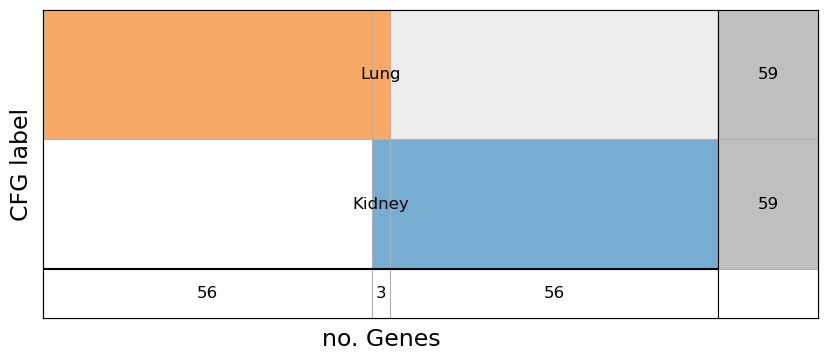

In [11]:
from help.utility.selection import EG_tissues_intersect
csEGs, overlap, diffs = EG_tissues_intersect(tissues = {'Kidney': pd.read_csv(f'{datapath}/label_Kidney.csv', index_col=0),
                                                        'Lung': pd.read_csv(f'{datapath}/label_Lung.csv', index_col=0)
                                                       }, 
                        common_df = pd.read_csv(f'{datapath}/label_PanTissue.csv', index_col=0),
                        display=True, verbose=True)

then we save the csEGs into a file.

In [19]:
with open(f'{datapath}/csEG_Kidney.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(list(csEGs['Kidney'])))
with open(f'{datapath}/csEG_Lung.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(list(csEGs['Lung'])))

# Embedding

In [ ]:
!pip install -q karateclub

In [ ]:
from help.preprocess.embedding import PPI_embed
df_net = pd.read_csv('/kaggle/input/dataset/dataset/KIDNEY/FEATURES/PPI.csv')
df_embed = PPI_embed(df_net, method="DeepWalk")

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We can apply missin values fixing and data scaling.

In [20]:
from help.preprocess.loaders import feature_assemble
import os
label_file = '/kaggle/working/label_Kidney.csv'
feature_dir = '/kaggle/input/dataset/dataset/KIDNEY/FEATURES'
features = [{'fname': os.path.join(feature_dir, 'Kidney_BIO.csv'), 'fixna' : True, 'normalize': 'std'},
            {'fname': os.path.join(feature_dir, 'Kidney_CCcfs.csv'), 'fixna' : True, 'normalize': 'std'}
           ]
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=True, seed=1, saveflag=False, verbose=True)
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

Loading /kaggle/working/label_Kidney.csv
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 0 Nan...
[Kidney_BIO.csv] Normalization with std ...
[Kidney_CCcfs.csv] found 0 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
6064 labeled genes over a total of 6265
(6064, 3331) data input


,Gene length,Transcripts count,GC content,GTEX_kidney,Gene-Disease association,OncoDB_expression,HPA_kidney,GO-MF,GO-BP,GO-CC,...,Yolk plasma,Z chromosome,Z disc,Z granule,Zeta DNA polymerase complex,Zona pellucida receptor complex,Zonula adherens,Zymogen granule,Zymogen granule membrane,label
A1BG,0.003351,0.020942,0.501832,0.000020,0.002950,0.651992,0.000002,0.084365,0.038663,0.115385,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NE
A1CF,0.034865,0.047120,0.160530,0.000020,0.021528,0.556939,0.000232,0.069767,0.041026,0.096154,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NE
AAK1,0.087457,0.062827,0.260164,0.000063,0.019237,0.629675,0.000181,0.116279,0.035897,0.134615,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NE
AAMP,0.002435,0.047120,0.512825,0.000892,0.019237,0.639246,0.001034,0.023256,0.015385,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,E
AARS1,0.015241,0.214660,0.393300,0.002200,0.002950,0.654857,0.000805,0.186047,0.035897,0.076923,...,0.000345,0.011781,0.016371,0.001099,0.00029,0.002768,0.003931,0.007424,0.003293,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM4,0.014855,0.010471,0.462223,0.000077,0.018692,0.625069,0.000013,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NE
ZSWIM5,0.117155,0.005236,0.252137,0.000030,0.011799,0.630142,0.000053,0.000000,0.000000,0.019231,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NE
ZSWIM6,0.086471,0.000000,0.194381,0.000078,0.008850,0.695415,0.000079,0.000000,0.005128,0.000000,...,0.000000,0.334003,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NE
ZZEF1,0.056017,0.052356,0.304484,0.000096,0.044248,0.657491,0.000121,0.093023,0.010256,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NE


# Prediction
We process k-fold cross validation of a LightGBM classifier, and then storing predictions andprinting metrics.

{'E': 0, 'NE': 1}
label
NE       4822
E        1242
Name: count, dtype: int64


5-fold: 100%|██████████| 5/5 [01:26<00:00, 17.28s/it]


,measure
ROC-AUC,0.0503±0.0037
Accuracy,0.9040±0.0039
BA,0.8605±0.0112
Sensitivity,0.7866±0.0244
Specificity,0.9343±0.0032
MCC,0.7101±0.0148
CM,"[[977, 265], [317, 4505]]"


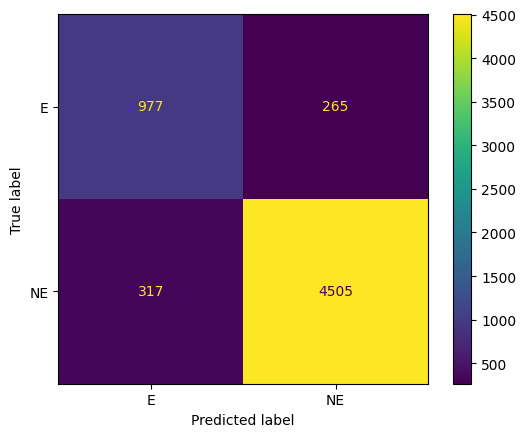

In [22]:
from help.models.prediction import predict_cv
predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv') 